In [1]:
import time

import numpy as np
import scienceplots
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model.lstm_attention_ import LSTMAttention
from model.lstm import LSTM
from model.gru import GRU
from model.cnn_lstm import CNN_LSTM
from model.cnn_lstm_pro import CNN_LSTM_PRO
from model.cnn_gru import CNN_GRU
from model.lstm_attention import LSTM_Attention
from data_process import process_data, EMA
from load_model import load_model
from sklearn.model_selection import KFold, cross_val_score
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu
cpu


KeyError: "['TM'] not found in axis"

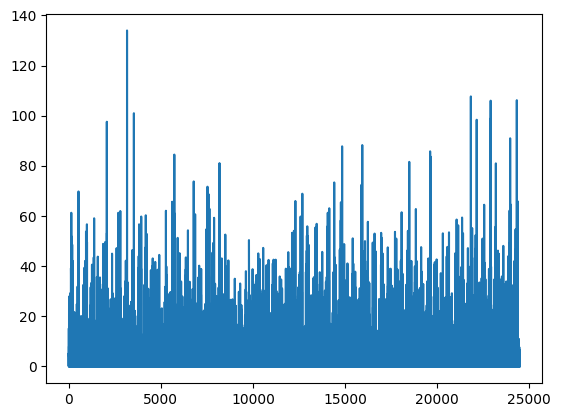

In [2]:
# def run(seq_len):
input_size = 9
in_channels = 2
out_channels = 2
hidden_size = 32
num_layers = 2
output_size = 9
seq_len = 30
epochs = 50000
files = ['2015_2020', '2013_2022DRPDRY','330112MYL']
file = files[2]
data_Normalize = True
is_bidirection = True
LR = 0.01

dataX, dataY, trainX, trainY, testX, testY, scaler = process_data(file, seq_len, data_Normalize)
plt.show()
plt.clf()

model = LSTM(input_size, hidden_size, num_layers, output_size, is_bidirection).to(device)
# model = GRU(input_size, hidden_size, num_layers, output_size, is_bidirection).to(device)
# model = CNN_GRU(in_channels, out_channels, hidden_size, num_layers, output_size, is_bidirection).to(device)
# model = CNN_LSTM(in_channels, out_channels, hidden_size, num_layers, output_size, is_bidirection).to(device)
# model = CNN_LSTM_PRO(in_channels, out_channels, hidden_size, num_layers, output_size, is_bidirection).to(device)
# model = LSTM_Attention(input_size, hidden_size, num_layers, output_size, is_bidirection, seq_len).to(device)
# model = LSTMAttention(input_size, hidden_size, num_layers, output_size).to(device)
# model = bilstm_attn(batch_size=16,
#                                   output_size=output_size,
#                                   hidden_size=hidden_size,
#                                   vocab_size=dataX.size(0),
#                                   embed_dim=input_size,
#                                   bidirectional=is_bidirection,
#                                   dropout=0.5,
#                                   use_cuda=device,
#                                   attention_size=seq_len,
#                                   sequence_length=seq_len)

PATH = f'data/model/model{model.__class__.__name__}{"_bi" if is_bidirection else ""}_file{file}_seq{seq_len}_Normalize{data_Normalize}.pt'

criterion = nn.MSELoss().to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=1 / epochs)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=(lambda epoch: 0.99 ** (epoch//1000)))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=epochs // 4, gamma=0.5)
# training
start = time.time()
train_loss = []
for epoch in range(epochs):
    outputs = model(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))
    train_loss.append(loss.item())
print('Time Used:', time.time() - start)

with plt.style.context(['science', 'ieee']):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(train_loss)), train_loss)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Training Loss', fontsize=20)
    plt.savefig('data/img/tarin_loss.jpg')
    plt.show()
    # return model, PATH, load_model(model, seq_len)

In [ ]:
torch.save(model, PATH)
print(f'Save as: {PATH}')

In [ ]:
seqs = range(3, 15)
mn = 999
best_model = None
path = None
for i in seqs:
    model, PATH, mape = run(i)
    if mape < mn:
        mn = mape
        best_model = model
        path = PATH
    print(mape)
print(mn)

In [ ]:
torch.save(best_model, path)
print(f'Save as: {path}')

In [21]:
epochs = 100000
initial_loss = 0.94
final_loss = 0.2

# 使用logspace生成一个在对数尺度上递减的loss数组，然后线性地映射到initial_loss到final_loss的范围
log_loss = np.logspace(np.log(initial_loss), np.log(final_loss), epochs)
linear_loss = np.linspace(initial_loss, final_loss, epochs)

# 将log_loss作为主要趋势，加上一些随机噪声来模拟实际训练过程中的波动
noise = np.random.normal(0, 0.001, epochs)
loss_data = log_loss + noise

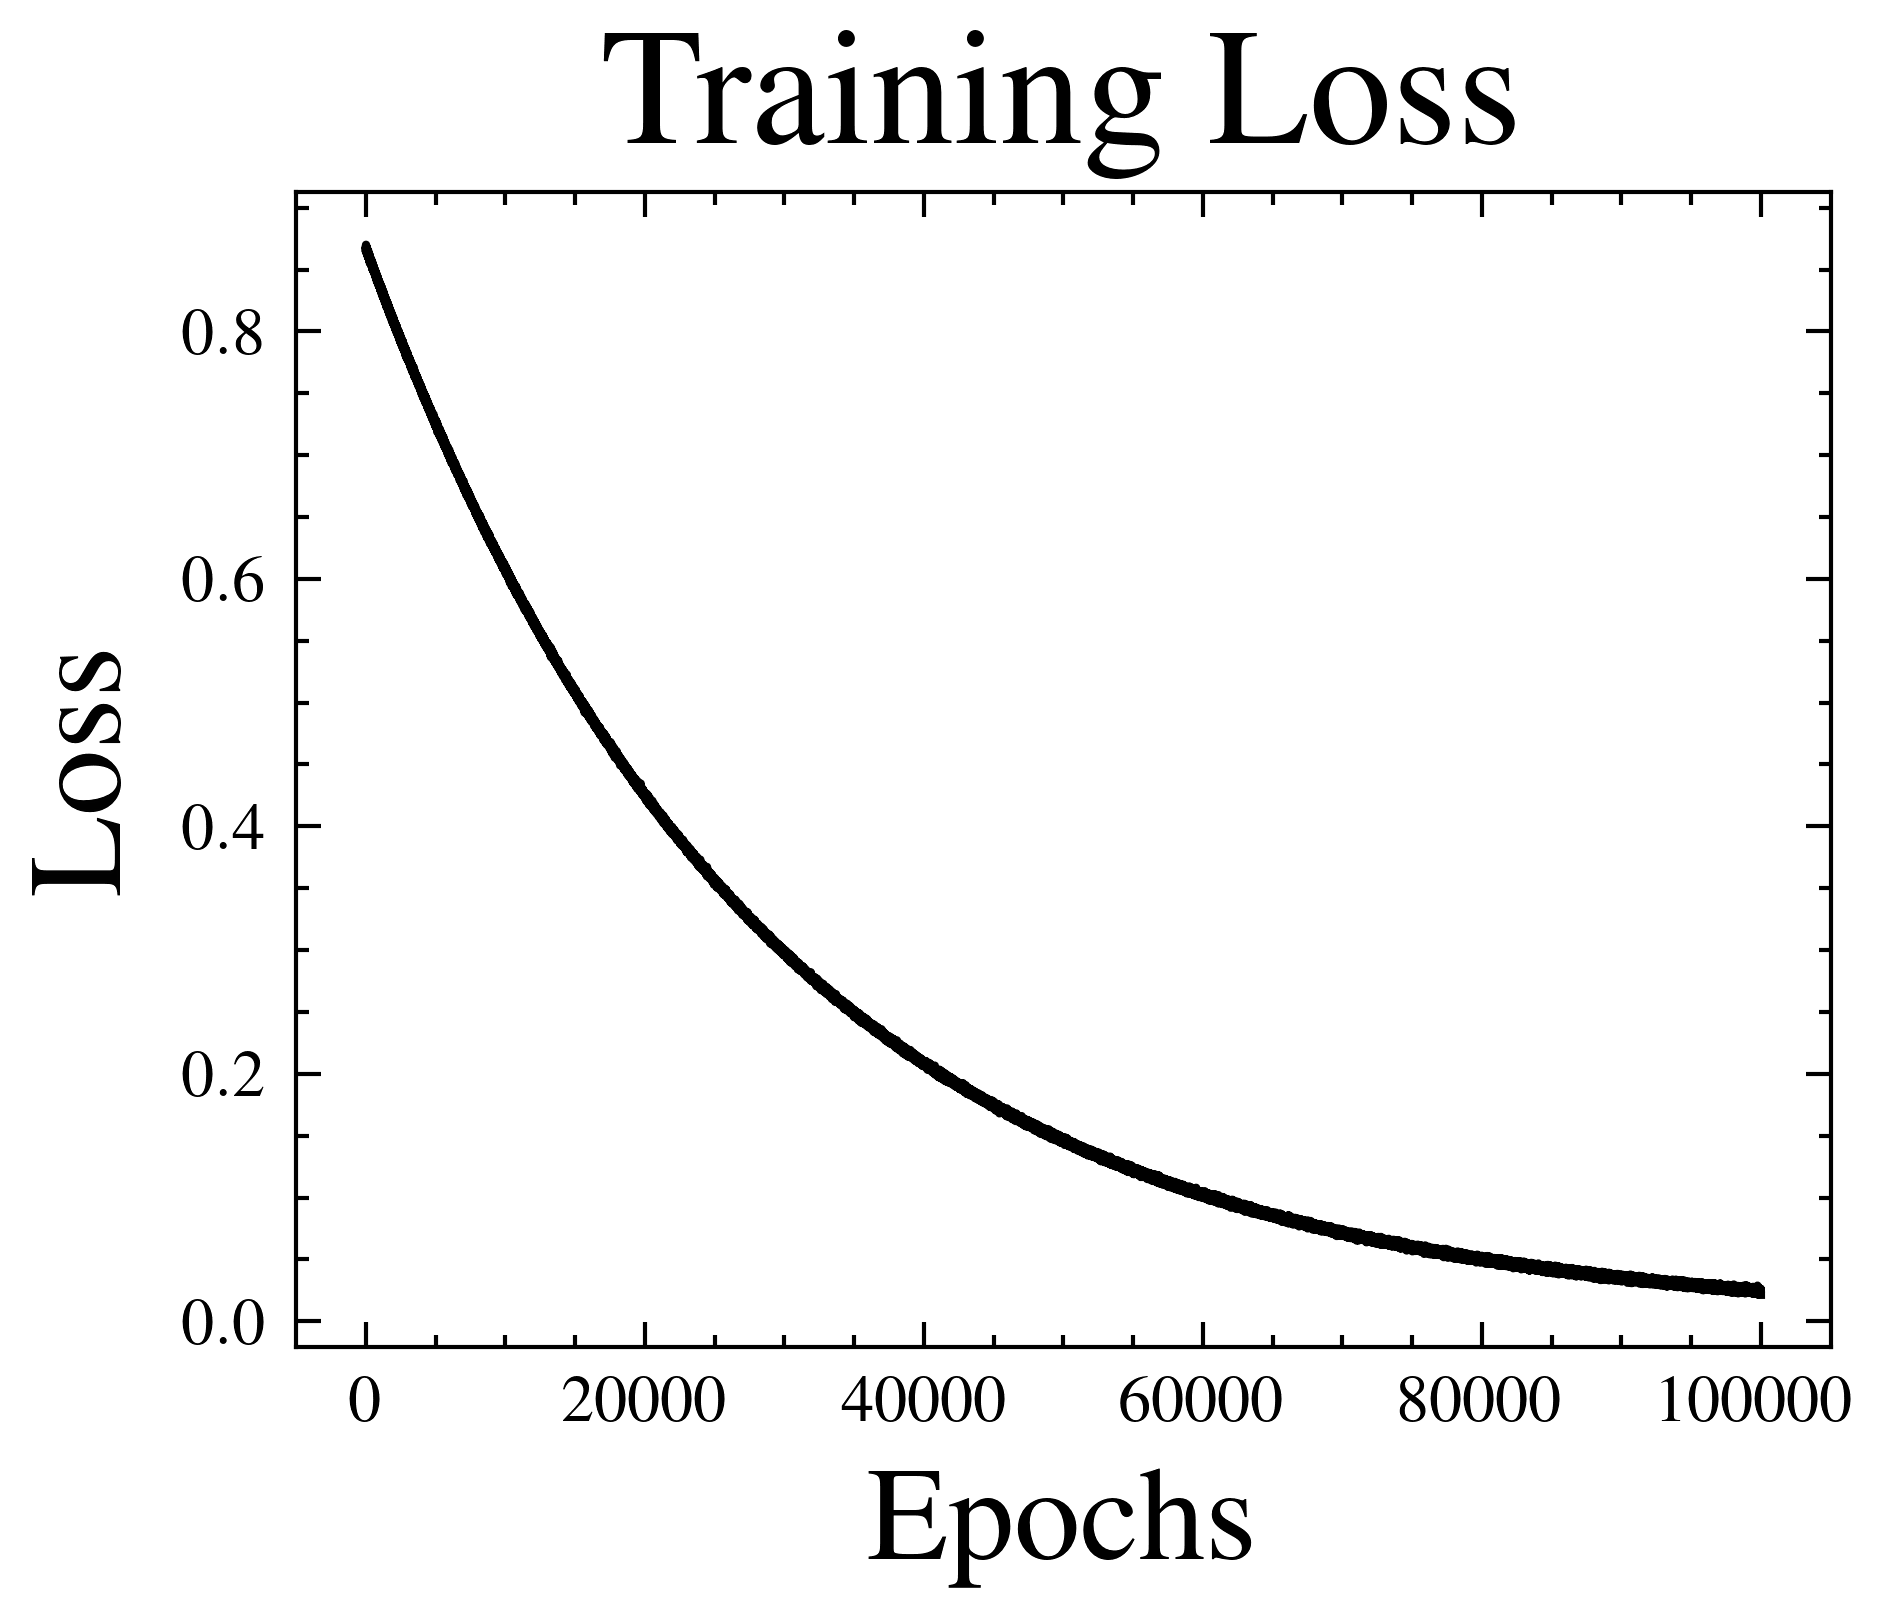

In [22]:
# loss_data[:]  # 展示前10个epoch的loss数据作为示例
with plt.style.context(['science', 'ieee']):
    # plt.figure(figsize=(8, 6))
    plt.plot(range(len(loss_data)), loss_data[:])
    # plt.xticks(fontsize=16)
    # plt.yticks(fontsize=16)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Training Loss', fontsize=20)
    plt.savefig('data/img/tarin_loss.jpg')
    plt.show()